# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview
This Dandiset is part of the Allen Institute Openscope project aiming to understand neural representations in the mouse brain. 
The study investigates how visual stimuli are processed from the thalamus through various brain regions up to the hippocampus.

Dandiset URL: [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

## Summary
The notebook covers the following:
- Loading the Dandiset using the DANDI API
- Exploring NWB file structure
- Visualizing neural data

## Required Packages
- dandi
- pynwb
- remfile
- h5py
- matplotlib

## Loading the Dandiset
Code to access Dandiset details and list assets using the DANDI API.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## Loading and Exploring NWB Data
This example loads LFP data from one of the NWB files and generates a plot demonstrating channel separation.

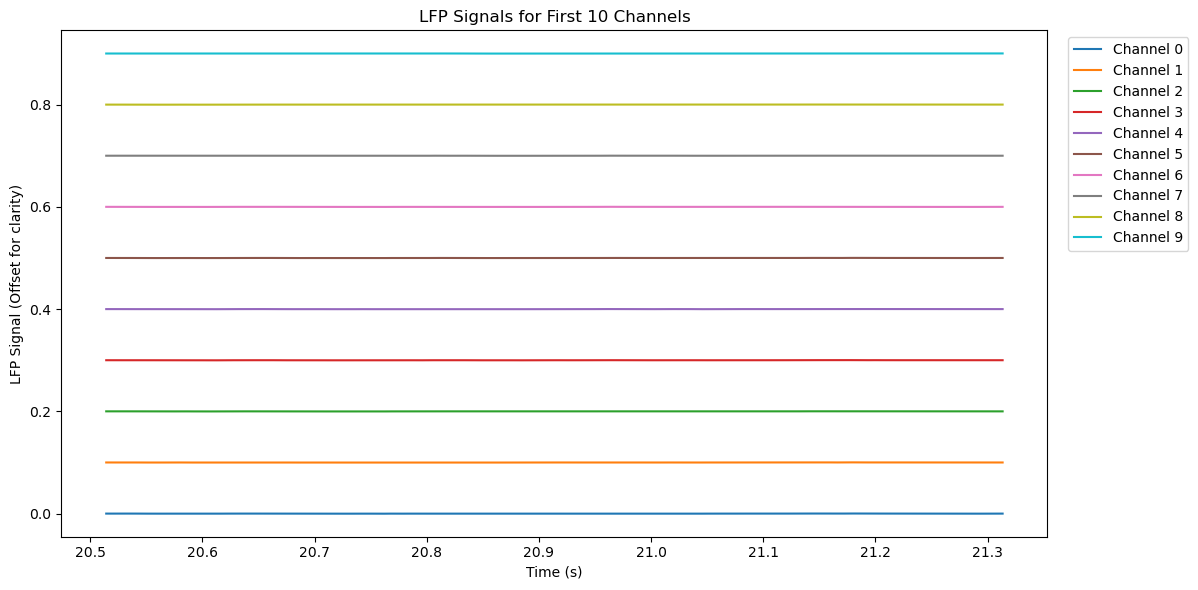

In [2]:
import pynwb
import remfile
import h5py
import matplotlib.pyplot as plt

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)

# Load LFP data
lfp_data = h5_file['acquisition']['probe_0_lfp']['probe_0_lfp_data']['data']
timestamps = h5_file['acquisition']['probe_0_lfp']['probe_0_lfp_data']['timestamps']

# Select a subset of data for plotting
select_channels = range(10)  # First 10 channels
select_time = slice(0, 1000) # First 1000 samples
data_subset = lfp_data[select_time, select_channels]
time_subset = timestamps[select_time]

# Plotting
plt.figure(figsize=(12, 6))
for i, channel in enumerate(select_channels):
    plt.plot(time_subset, data_subset[:, i] + (i * 0.1), label=f'Channel {channel}')  # Offset for clarity

plt.xlabel('Time (s)')
plt.ylabel('LFP Signal (Offset for clarity)')
plt.title('LFP Signals for First 10 Channels')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

## Conclusion
The notebook demonstrated how to load and visually explore LFP data from Dandiset 000690. 
Future work could include more advanced visualizations and deeper analysis of the data.